此專案為練習用並參考下方連結 :
[資料分析&機器學習] 第4.1講 : Kaggle競賽-鐵達尼號生存預測(前16%排名) https://reurl.cc/r6pzjk

PassengerId — 乘客編號
Survived — 是否生還（0=否，1=是；只有訓練集有）
Pclass — 艙等（1, 2, 3）
Name — 姓名
Sex — 性別（male, female）
Age — 年齡
SibSp — 手足及配偶人數
Parch — 父母及子女人數
Ticket — 船票號碼
Fare — 船票價格
Cabin — 艙房號碼
Embarked — 出發港口（C = Cherbourg, Q = Queenstown, S = Southampton）

In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.options.mode.chained_assignment = None

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
submit_df = pd.read_csv('gender_submission.csv')

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [8]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [11]:
# Combine Train and Test Data
df = pd.concat([train_df,test_df])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [12]:
# 因合併後 index會重複,故重新設定
df.reset_index(inplace=True,drop=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## Data Analysis

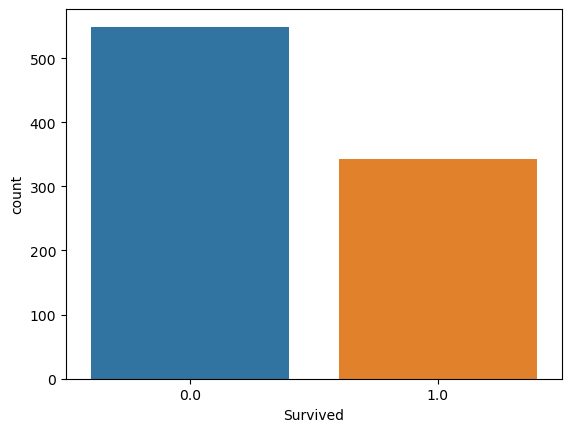

In [13]:
sns.countplot(data=df,x='Survived')
plt.show()

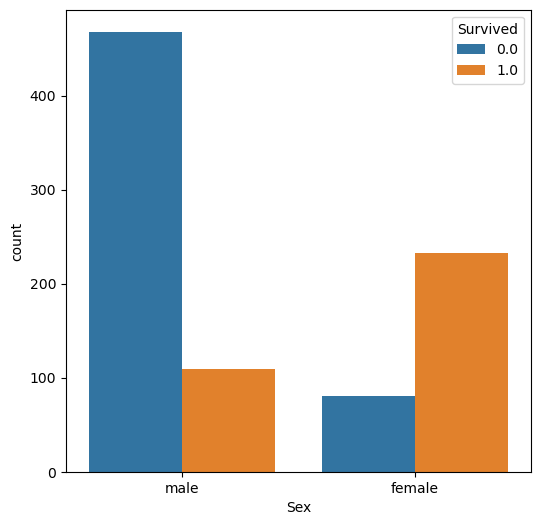

In [14]:
plt.figure(figsize=(6,6))
sns.countplot(data=df,x='Sex',hue='Survived')
plt.show()

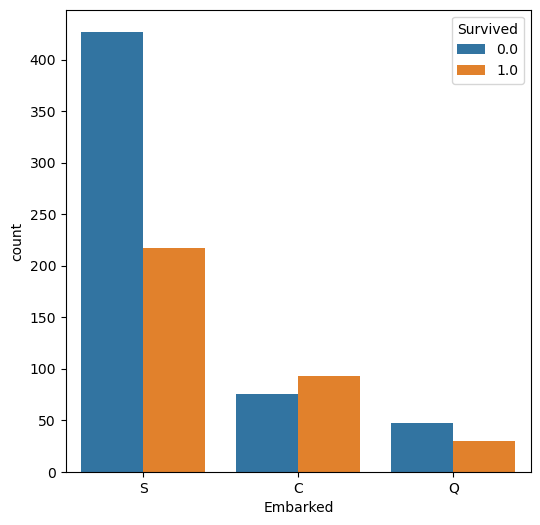

In [15]:
# 從S港出發的人生存率明顯較低,可能是買票的價位較低
plt.figure(figsize=(6,6))
sns.countplot(data=df,x='Embarked',hue='Survived')
plt.show()

/Users/eric/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


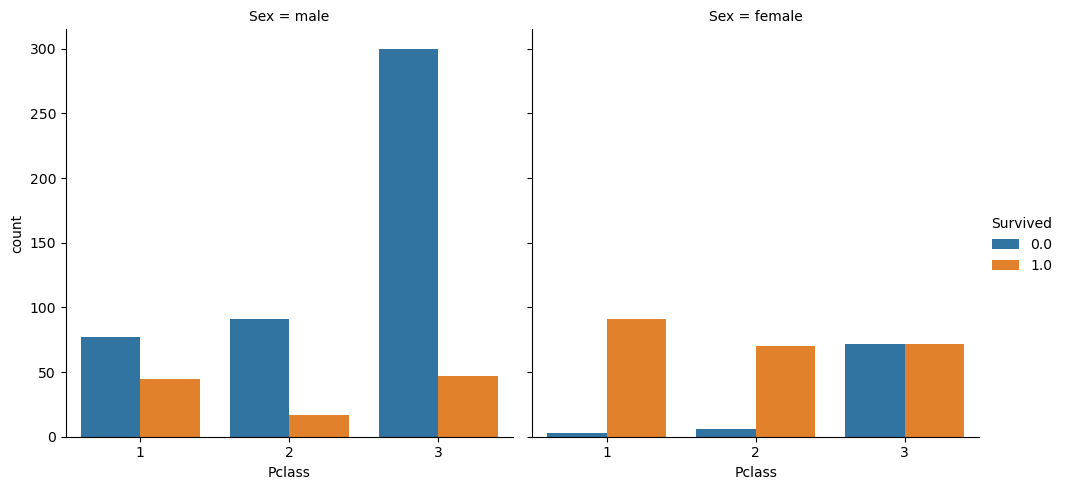

In [16]:
# 艙等越高級 生存率越高
# 當年的鐵達尼號和別的豪華客輪一樣，將救生艇安排在離頭等艙和二等艙最近的位置
# 社會階層的隔離制度和空間構造。當時的美國移民法規定，爲了防止偷渡和傳染病，三等艙乘客要全程與頭等艙和二等艙隔離。
# 因此，三等艙乘客跑到頭等艙，必須要跨越一道道嚴固的柵欄。故頭等艙與二等艙有非常明顯的優勢

sns.catplot(data=df,x='Pclass',col='Sex',hue='Survived',kind='count')
plt.show()

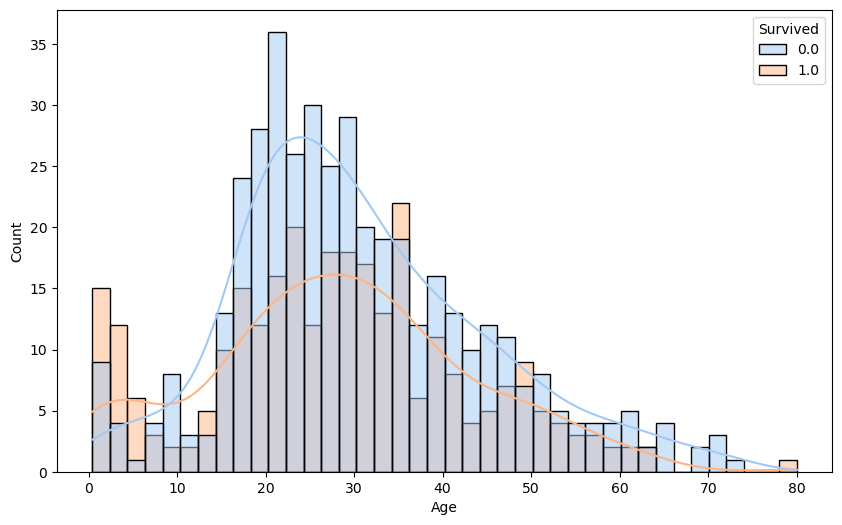

In [17]:
# 看起來小孩與年輕人生還機率較高
plt.figure(figsize=(10,6))
sns.histplot(data=df,x='Age',bins=40,hue='Survived',kde=True,palette='pastel')
plt.show()

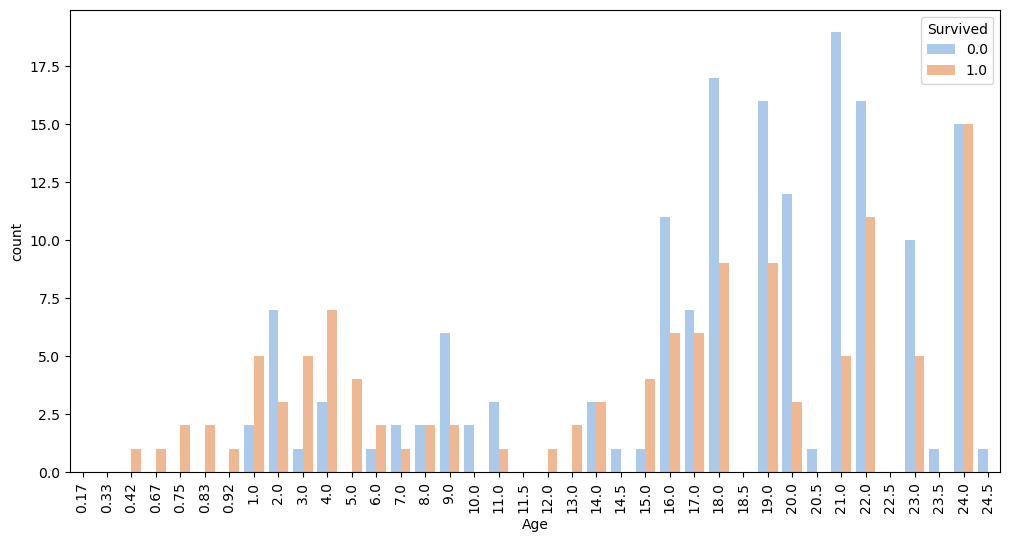

In [18]:
plt.figure(figsize=(12,6))
sns.countplot(data=df[df['Age']<25],x='Age',hue='Survived',palette='pastel')
plt.xticks(rotation=90)
plt.show()

/Users/eric/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


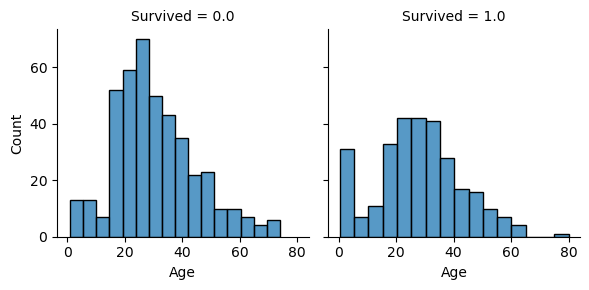

In [19]:
# 年紀小的生存率較高
g = sns.FacetGrid(df,col='Survived')
g.map(sns.histplot,'Age',kde=False)
plt.show()

/Users/eric/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


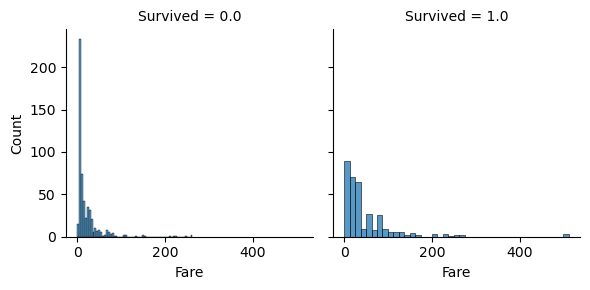

In [20]:
# 票價低的生存率低
g = sns.FacetGrid(df,col='Survived')
g.map(sns.histplot,'Fare',kde=False)
plt.show()

/Users/eric/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


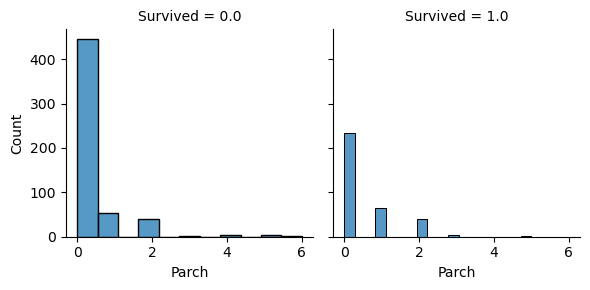

In [21]:
# 有跟父母小孩一起來的人比一個人來的生存率高
g = sns.FacetGrid(df,col='Survived')
g.map(sns.histplot,'Parch',kde=False)
plt.show()

/Users/eric/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


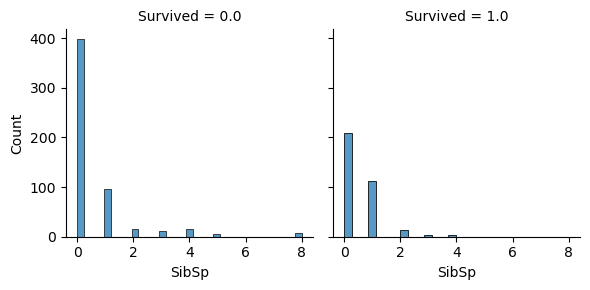

In [22]:
# 有手足配偶的比單身的人存活率要高
g = sns.FacetGrid(df,col='Survived')
g.map(sns.histplot,'SibSp',kde=False)
plt.show()

/Users/eric/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


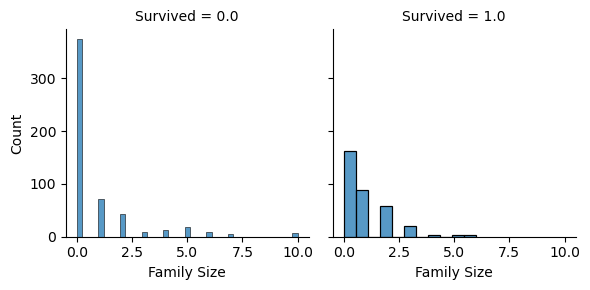

In [23]:
df['Family Size'] = df['Parch'] + df['SibSp']
g = sns.FacetGrid(df,col='Survived')
g.map(sns.histplot,'Family Size',kde=False)
plt.show()

## Feature Engineering

In [24]:
df['Title'] = df['Name'].str.split(',',expand=True)[1]

In [25]:
df['Title']

0                                   Mr. Owen Harris
1        Mrs. John Bradley (Florence Briggs Thayer)
2                                       Miss. Laina
3                Mrs. Jacques Heath (Lily May Peel)
4                                 Mr. William Henry
                           ...                     
1304                                      Mr. Woolf
1305                                  Dona. Fermina
1306                            Mr. Simon Sivertsen
1307                                  Mr. Frederick
1308                              Master. Michael J
Name: Title, Length: 1309, dtype: object

In [26]:
df['Name'].str.split(',',expand=True).head()

,0,1
0,Braund,Mr. Owen Harris
1,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,Heikkinen,Miss. Laina
3,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,Allen,Mr. William Henry


In [27]:
df['Title'].head()

0                                Mr. Owen Harris
1     Mrs. John Bradley (Florence Briggs Thayer)
2                                    Miss. Laina
3             Mrs. Jacques Heath (Lily May Peel)
4                              Mr. William Henry
Name: Title, dtype: object

In [28]:
df['Title'] = df['Title'].str.split('.',expand=True)[0]

In [29]:
df['Title'].head()

0       Mr
1      Mrs
2     Miss
3      Mrs
4       Mr
Name: Title, dtype: object

In [30]:
df['Title'].unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Don', ' Rev', ' Dr', ' Mme',
       ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' the Countess', ' Jonkheer', ' Dona'], dtype=object)

In [31]:
pd.crosstab(df['Title'],df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,4
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,61


In [32]:
pd.crosstab(df['Title'],df['Sex']).T.style.background_gradient(cmap='summer_r')

Title,Capt,Col,Don,Dona,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Sex,,,,,,,,,,,,,,,,,,
female,0,0,0,1,1,0,1,0,0,260,2,1,0,197,2,0,0,1
male,1,4,1,0,7,1,0,2,61,0,0,0,757,0,0,8,1,0


In [33]:
pd.crosstab(df['Title'],df['Survived']).T.style.background_gradient(cmap='summer_r')

Title,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Survived,,,,,,,,,,,,,,,,,
0.000000,1,1,1,4,1,0,1,17,55,0,0,436,26,0,6,0,0
1.000000,0,1,0,3,0,1,1,23,127,2,1,81,99,1,0,1,1


In [34]:
# 用Title分類, 只抓取 Age 的平均
df.groupby(['Title'])['Age'].mean()

Title
 Capt            70.000000
 Col             54.000000
 Don             40.000000
 Dona            39.000000
 Dr              43.571429
 Jonkheer        38.000000
 Lady            48.000000
 Major           48.500000
 Master           5.482642
 Miss            21.774238
 Mlle            24.000000
 Mme             24.000000
 Mr              32.252151
 Mrs             36.994118
 Ms              28.000000
 Rev             41.250000
 Sir             49.000000
 the Countess    33.000000
Name: Age, dtype: float64

In [35]:
df.groupby(['Title','Pclass'])['Age'].mean()

Title          Pclass
 Capt          1         70.000000
 Col           1         54.000000
 Don           1         40.000000
 Dona          1         39.000000
 Dr            1         45.600000
               2         38.500000
 Jonkheer      1         38.000000
 Lady          1         48.000000
 Major         1         48.500000
 Master        1          6.984000
               2          2.757273
               3          6.090000
 Miss          1         30.338983
               2         20.717083
               3         17.360874
 Mlle          1         24.000000
 Mme           1         24.000000
 Mr            1         41.450758
               2         32.346715
               3         28.318910
 Mrs           1         43.208955
               2         33.518519
               3         32.326531
 Ms            2         28.000000
               3               NaN
 Rev           2         41.250000
 Sir           1         49.000000
 the Countess  1         33.00000

In [36]:
df['Title1'] = df['Title'].replace(to_replace=['Mlle','Mme','Ms','Dr','Major','Lady','the Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],
                                    value=['Miss','Mrs','Miss','Mr','Mr','Mrs','Mrs','Mr','Mr','Mr','Mr','Mr','Mr','Mrs']).str.strip()

df['Title1'] = df['Title1'].replace(to_replace=['Mlle','Mme','Ms','Dr','Major','Lady','the Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],
                                    value=['Miss','Mrs','Miss','Mr','Mr','Mrs','Mrs','Mr','Mr','Mr','Mr','Mr','Mr','Mrs']).str.strip()
# 去除稱謂值前後的空格
# df['Title1'] = df['Title1'].str.strip()

In [37]:
df['Title1'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master'], dtype=object)

In [38]:
pd.crosstab(df['Title1'],df['Sex']).T.style.background_gradient(cmap='summer_r')

Title1,Master,Miss,Mr,Mrs
Sex,,,,
female,0,264,1,201
male,61,0,782,0


In [39]:
pd.crosstab(df['Title1'],df['Survived']).T.style.background_gradient(cmap='summer_r')

Title1,Master,Miss,Mr,Mrs
Survived,,,,
0.000000,17,55,451,26
1.000000,23,130,87,102


In [40]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family Size,Title,Title1
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,Mr,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,Mrs,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Miss,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,Mrs,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,Mr,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0,Mr,Mr
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,0,Dona,Mrs
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,Mr,Mr
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0,Mr,Mr


In [41]:
# 1. Ticket replace . to 空格, / to 空格, strip()減去前後值空格,split(' ')裡面記得要再空格, grab first number
# 2. if 抓去第一個數值後,剩下的數值如果非全數值 就依照前面方法繼續抓取, 否則全設為 X
# 這個條件判斷是為了區分是否全為數字，因為有些 'Ticket' 可能只是純數字表示。
df['Ticket_info'] = df['Ticket'].apply(lambda x : x.replace('.','').replace('/','').strip().split(' ')[0] 
                                       if not x.isdigit() else 'X')

In [42]:
df['Ticket_info'].unique()

array(['A5', 'PC', 'STONO2', 'X', 'PP', 'CA', 'SCParis', 'SCA4', 'A4',
       'SP', 'SOC', 'WC', 'SOTONOQ', 'WEP', 'STONO', 'C', 'SCPARIS',
       'SOP', 'Fa', 'LINE', 'FCC', 'SWPP', 'SCOW', 'PPP', 'SC', 'SCAH',
       'AS', 'SOPP', 'FC', 'SOTONO2', 'CASOTON', 'SCA3', 'STONOQ', 'AQ4',
       'A', 'LP', 'AQ3'], dtype=object)

In [43]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
Family Size       0
Title             0
Title1            0
Ticket_info       0
dtype: int64

In [44]:
# 票價的Missing Value很少, 直接用平均補上
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())

# Embarked Missing Value are less, use the moste people 'S' Embarked to replace
df['Embarked'] = df['Embarked'].fillna('S')

In [45]:
df['Cabin'].head(10)

0     NaN
1     C85
2     NaN
3    C123
4     NaN
5     NaN
6     E46
7     NaN
8     NaN
9     NaN
Name: Cabin, dtype: object

In [46]:
# grab the cabin first word, if not null grab the first word, else fill in 'NoCabin'
df['Cabin'] = df['Cabin'].apply(lambda x : str(x)[0] if not pd.isnull(x) else 'NoCabin')

In [47]:
df['Cabin'].unique()

array(['NoCabin', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

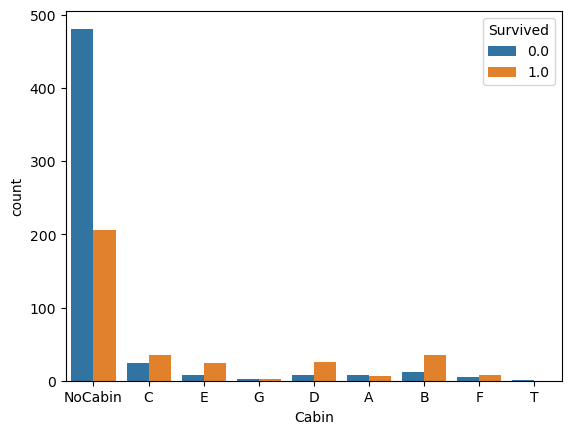

In [48]:
sns.countplot(data=df,x='Cabin',hue='Survived')
plt.show()

In [49]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family Size,Title,Title1,Ticket_info
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NoCabin,S,1,Mr,Mr,A5
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,1,Mrs,Mrs,PC
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NoCabin,S,0,Miss,Miss,STONO2
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,1,Mrs,Mrs,X
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NoCabin,S,0,Mr,Mr,X
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NoCabin,S,0,Mr,Mr,A5
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,C,0,Dona,Mrs,PC
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NoCabin,S,0,Mr,Mr,SOTONOQ
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NoCabin,S,0,Mr,Mr,X


In [50]:
# Import the models
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score,classification_report
from xgboost import XGBClassifier


In [51]:
# 將文字類別轉換為數值型編碼 比較好使模型訓練
df['Sex'] = df['Sex'].astype('category').cat.codes
df['Embarked'] = df['Embarked'].astype('category').cat.codes
df['Pclass'] = df['Pclass'].astype('category').cat.codes
df['Title'] = df['Title'].astype('category').cat.codes
df['Title1'] = df['Title1'].astype('category').cat.codes
df['Cabin'] = df['Cabin'].astype('category').cat.codes
df['Ticket_info'] = df['Ticket_info'].astype('category').cat.codes

In [52]:
dfAgeNull = df[df['Age'].isnull()]
dfAgeNotNull = df[df['Age'].notnull()]

In [53]:
# 檢測outliers, 計算每個 'Fare','Family Size' 值與該欄位平均值的絕對差異是否大於該欄位標準差的四倍

remove_outliers = dfAgeNotNull[(np.abs(dfAgeNotNull['Fare']-dfAgeNull['Fare'].mean())>(4*dfAgeNotNull['Fare'].std()))|
                               (np.abs(dfAgeNotNull['Family Size']-dfAgeNull['Family Size'].mean())>(4*dfAgeNotNull['Fare'].std()))]

In [54]:
# predict Age, 其餘數值預測=Features, Age=label

rfModel_Age = RandomForestRegressor(n_estimators=2000,random_state=101)
agecolumns = ['Embarked', 'Fare', 'Pclass', 'Sex', 'Family Size', 'Title', 'Title1','Cabin','Ticket_info']
rfModel_Age.fit(remove_outliers[agecolumns],remove_outliers['Age'])

RandomForestRegressor(n_estimators=2000, random_state=101)

In [55]:
# 為了填補空缺的年齡
# 用 rfModel_age 對具有缺失年齡值的資料 dfAgeNull 中的特徵 agecolumns 進行預測，獲得了預測的年齡存放在 ageNullValues 中。
ageNullValues = rfModel_Age.predict(X=dfAgeNull[agecolumns])

# (:) 中的 所有 "Age" 欄位用預測到的 ageNullValues填補。
dfAgeNull.loc[:,'Age'] = ageNullValues

# Combine the dfAgeNull and dfAgeNotNull dataset
df_new = pd.concat([dfAgeNull,dfAgeNotNull])
df_new.reset_index(inplace=True,drop=True)

In [56]:
# split into train and test dataset
dfTrain = df_new[pd.notnull(df_new['Survived'])].sort_values(['PassengerId'])
dfTest = df_new[~pd.notnull(df_new['Survived'])].sort_values(['PassengerId'])

In [57]:
dfTrain

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family Size,Title,Title1,Ticket_info
263,1,0.0,2,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,7,2,1,12,2,2
264,2,1.0,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,2,0,1,13,3,14
265,3,1.0,2,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,7,2,0,9,1,31
266,4,1.0,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,2,2,1,13,3,36
267,5,0.0,2,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,7,2,0,12,2,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,887,0.0,1,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,7,2,0,15,2,36
974,888,1.0,0,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,1,2,0,9,1,36
176,889,0.0,2,"Johnston, Miss. Catherine Helen ""Carrie""",0,25.573598,1,2,W./C. 6607,23.4500,7,2,3,9,1,34
975,890,1.0,0,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,2,0,0,12,2,36


In [58]:
dfTrain.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Family Size', 'Title',
       'Title1', 'Ticket_info'],
      dtype='object')

In [59]:
dfTest

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family Size,Title,Title1,Ticket_info
977,892,NaN,2,"Kelly, Mr. James",1,34.500000,0,0,330911,7.8292,7,1,0,12,2,36
978,893,NaN,2,"Wilkes, Mrs. James (Ellen Needs)",0,47.000000,1,0,363272,7.0000,7,2,1,13,3,36
979,894,NaN,1,"Myles, Mr. Thomas Francis",1,62.000000,0,0,240276,9.6875,7,1,0,12,2,36
980,895,NaN,2,"Wirz, Mr. Albert",1,27.000000,0,0,315154,8.6625,7,2,0,12,2,36
981,896,NaN,2,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.000000,1,1,3101298,12.2875,7,2,2,13,3,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,1305,NaN,2,"Spector, Mr. Woolf",1,33.900937,0,0,A.5. 3236,8.0500,7,2,0,12,2,2
1307,1306,NaN,0,"Oliva y Ocana, Dona. Fermina",0,39.000000,0,0,PC 17758,108.9000,2,0,0,3,3,14
1308,1307,NaN,2,"Saether, Mr. Simon Sivertsen",1,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,7,2,0,12,2,28
261,1308,NaN,2,"Ware, Mr. Frederick",1,33.909812,0,0,359309,8.0500,7,2,0,12,2,36


In [60]:
dfTest.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Family Size', 'Title',
       'Title1', 'Ticket_info'],
      dtype='object')

In [61]:
# train data 才有Survived
X = dfTrain[['Age', 'Embarked', 'Fare',  'Pclass', 'Sex', 'Family Size', 'Title1','Ticket_info','Cabin']]
y = dfTrain['Survived']
dfTest = dfTest[['Age', 'Embarked', 'Fare', 'Pclass', 'Sex', 'Family Size', 'Title1','Ticket_info','Cabin']]

In [62]:
# Featrues
X

,Age,Embarked,Fare,Pclass,Sex,Family Size,Title1,Ticket_info,Cabin
263,22.000000,2,7.2500,2,1,1,2,2,7
264,38.000000,0,71.2833,0,0,1,3,14,2
265,26.000000,2,7.9250,2,0,0,1,31,7
266,35.000000,2,53.1000,0,0,1,3,36,2
267,35.000000,2,8.0500,2,1,0,2,36,7
...,...,...,...,...,...,...,...,...,...
973,27.000000,2,13.0000,1,1,0,2,36,7
974,19.000000,2,30.0000,0,0,0,1,36,1
176,25.573598,2,23.4500,2,0,3,1,34,7
975,26.000000,0,30.0000,0,1,0,2,36,2


In [63]:
# labels (targets)
y

263    0.0
264    1.0
265    1.0
266    1.0
267    0.0
      ... 
973    0.0
974    1.0
176    0.0
975    1.0
976    0.0
Name: Survived, Length: 891, dtype: float64

## Model Training

In [64]:
rfc = RandomForestClassifier(oob_score=True, random_state=1, n_jobs=-1)
criterion = ['gini', 'entropy']
n_estimators = [50, 100, 400, 700, 1000]
min_samples_leaf = [1,5,10]
min_samples_split = [2,4,10,12,16,20]

param_grid = { 'criterion':criterion, 'n_estimators':n_estimators, 'min_samples_leaf':min_samples_leaf, 
              'min_samples_split':min_samples_split}
gs = GridSearchCV(rfc, param_grid, scoring='accuracy', cv=3, n_jobs=-1)
gs = gs.fit(X,y)

print(gs.best_score_)
print(gs.best_params_) 


0.8305274971941637
{'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 20, 'n_estimators': 50}


In [68]:
rfc = RandomForestClassifier(criterion='gini', 
                             n_estimators=50,
                             min_samples_split=20,
                             min_samples_leaf=1,
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1) 

In [70]:
rfc.fit(X,y)
print("%.4f" % rfc.oob_score_)

0.8283


In [85]:
pd.concat((pd.DataFrame(X.columns, columns = ['variable']), 
           pd.DataFrame(rfc.feature_importances_, columns = ['Importance'])), 
           axis = 1).sort_values(by='Importance', ascending = False)[:20]

,variable,Importance
4,Sex,0.324446
6,Title1,0.139520
2,Fare,0.137101
0,Age,0.101908
3,Pclass,0.090457
8,Cabin,0.079188
5,Family Size,0.071347
7,Ticket_info,0.029893
1,Embarked,0.026139
